<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [71]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━╸━━━━━━━━━━━━━━━╸━━━━━   0.0 B /  ??.?MB @ 

In [72]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [73]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [75]:
# Example of web scraping to extract GME revenue data
import requests
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Use requests library to download the webpage
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content to extract data
    revenue_data = pd.read_html(response.text)
    # Process the extracted data as needed
    # ...

    # Print or display the extracted revenue_data
    print(revenue_data)

else:
    print(f"Failed to retrieve the webpage. Status Code: {response.status_code}")


[    GameStop Annual Revenue(Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   
5                                        2015   
6                                        2014   
7                                        2013   
8                                        2012   
9                                        2011   
10                                       2010   
11                                       2009   
12                                       2008   
13                                       2007   
14                                       2006   
15                                       2005   

   GameStop Annual Revenue(Millions of US $).1  
0                                       $6,466  
1                                       $8,285  
2                 

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [77]:
import yfinance as yf
ticker_symbol = "TSLA"
ticker = yf.Ticker(ticker_symbol)
historical_data = ticker.history(period="1d")
print(historical_data)


                  Open        High         Low       Close    Volume  \
Date                                                                   
2024-01-19  209.990005  213.190002  207.559998  210.452301  73726605   

            Dividends  Stock Splits  
Date                                 
2024-01-19          0             0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [78]:
import yfinance as yf
import pandas as pd
ticker_symbol = "TSLA"
ticker = yf.Ticker(ticker_symbol)
tesla_data = ticker.history(period="max")
print(tesla_data.head())
tesla_data.to_csv("tesla_stock_data.csv")


                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [79]:
tesla_data.reset_index(inplace=True)
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [81]:
import requests
from bs4 import BeautifulSoup
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    revenue_table = soup.find('table')
    data_list = []
    for row in revenue_table.find_all('tr')[1:]:
        columns = row.find_all('td')
        data_list.append({
            'Year': columns[0].text.strip(),
            'Revenue': columns[1].text.strip()
        })
    revenue_data = pd.DataFrame(data_list)
    print(revenue_data)
    revenue_data.to_csv("tesla_revenue_data.csv", index=False)

else:
    print(f"Failed to retrieve the webpage. Status Code: {response.status_code}")


    Year  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


Parse the html data using `beautiful_soup`.


In [82]:
import requests
from bs4 import BeautifulSoup
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    revenue_table = soup.find('table')
    data_list = []
    for row in revenue_table.find_all('tr')[1:]:
        columns = row.find_all('td')
        data_list.append({
            'Year': columns[0].text.strip(),
            'Revenue': columns[1].text.strip()
        })
    print(data_list)

else:
    print(f"Failed to retrieve the webpage. Status Code: {response.status_code}")


[{'Year': '2021', 'Revenue': '$53,823'}, {'Year': '2020', 'Revenue': '$31,536'}, {'Year': '2019', 'Revenue': '$24,578'}, {'Year': '2018', 'Revenue': '$21,461'}, {'Year': '2017', 'Revenue': '$11,759'}, {'Year': '2016', 'Revenue': '$7,000'}, {'Year': '2015', 'Revenue': '$4,046'}, {'Year': '2014', 'Revenue': '$3,198'}, {'Year': '2013', 'Revenue': '$2,013'}, {'Year': '2012', 'Revenue': '$413'}, {'Year': '2011', 'Revenue': '$204'}, {'Year': '2010', 'Revenue': '$117'}, {'Year': '2009', 'Revenue': '$112'}]


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [83]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    revenue_table = soup.find('table')
    tesla_revenue = pd.read_html(str(revenue_table))[0]
    tesla_revenue.columns = ['Date', 'Revenue']
    soup.find_all("tbody")[1]
    print(tesla_revenue)

else:
    print(f"Failed to retrieve the webpage. Status Code: {response.status_code}")


    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [84]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)


Execute the following lines to remove an null or empty strings in the Revenue column.


In [85]:
tesla_revenue = tesla_revenue.dropna(subset=['Revenue'])


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [86]:
print(tesla_revenue.tail())


    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [87]:
import yfinance as yf
import pandas as pd
gme_ticker_symbol = "GME"
gme_ticker = yf.Ticker(gme_ticker_symbol)
gme_data = gme_ticker.history(period="max")
print(gme_data.head())
gme_data.to_csv("gme_stock_data.csv")

                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666417  1.666417  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [88]:
gme_data.reset_index(inplace=True)
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666417  1.666417  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [100]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

if response.status_code == 200:
    html_data = response.text
    print("Webpage successfully downloaded.")
else:
    print(f"Failed to retrieve the webpage. Status Code: {response.status_code}")

# Now, 'html_data' contains the text of the webpage.

Webpage successfully downloaded.


Parse the html data using `beautiful_soup`.


In [104]:
from bs4 import BeautifulSoup

# Assuming 'html_data' contains the HTML text from the webpage
# If you've used the previous code snippet, 'html_data' is already defined

# Parse the HTML content
soup = BeautifulSoup(html_data, 'html.parser')

# Now 'soup' contains the parsed HTML content, and you can use it to navigate and extract information.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [106]:
soup.find_all("tbody")[1]


<tbody>
<tr>
<td style="text-align:center">2020-04-30</td>
<td style="text-align:center">$1,021</td>
</tr>
<tr>
<td style="text-align:center">2020-01-31</td>
<td style="text-align:center">$2,194</td>
</tr>
<tr>
<td style="text-align:center">2019-10-31</td>
<td style="text-align:center">$1,439</td>
</tr>
<tr>
<td style="text-align:center">2019-07-31</td>
<td style="text-align:center">$1,286</td>
</tr>
<tr>
<td style="text-align:center">2019-04-30</td>
<td style="text-align:center">$1,548</td>
</tr>
<tr>
<td style="text-align:center">2019-01-31</td>
<td style="text-align:center">$3,063</td>
</tr>
<tr>
<td style="text-align:center">2018-10-31</td>
<td style="text-align:center">$1,935</td>
</tr>
<tr>
<td style="text-align:center">2018-07-31</td>
<td style="text-align:center">$1,501</td>
</tr>
<tr>
<td style="text-align:center">2018-04-30</td>
<td style="text-align:center">$1,786</td>
</tr>
<tr>
<td style="text-align:center">2018-01-31</td>
<td style="text-align:center">$2,825</td>
</tr>
<t

In [107]:
pip install html5lib


Note: you may need to restart the kernel to use updated packages.


In [108]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [109]:
print(html_data)


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

# import pandas as pd

# Assuming 'table' contains the HTML table data
gme_revenue_df = pd.read_html(str(index_1))[0]

# Print or display the DataFrame
print(gme_revenue_df)




In [95]:
gme_revenue_table = soup.find('table', class_='your_table_class')


In [96]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage using requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

if response.status_code == 200:
    html_data = response.text
    print("Webpage downloaded successfully!")

    # Step 2: Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(html_data, 'html.parser')

    # Step 3: Find the table containing the revenue data
    gme_revenue_table = soup.find('table', {'class': 'historical_data_table'})

    if gme_revenue_table:
        # Step 4: Extract the table data using pandas
        gme_revenue = pd.read_html(str(gme_revenue_table))[0]

        # Step 5: Additional processing, if needed
        gme_revenue.columns = ['Date', 'Revenue']
        gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)

        # Step 6: Print or display the table
        print(gme_revenue.head())
    else:
        print("No historical_data_table class found in the webpage.")
else:
    print(f"Failed to retrieve the webpage. Status Code: {response.status_code}")


Webpage downloaded successfully!
   Date  Revenue
0  2020   6466.0
1  2019   8285.0
2  2018   8547.0
3  2017   7965.0
4  2016   9364.0


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


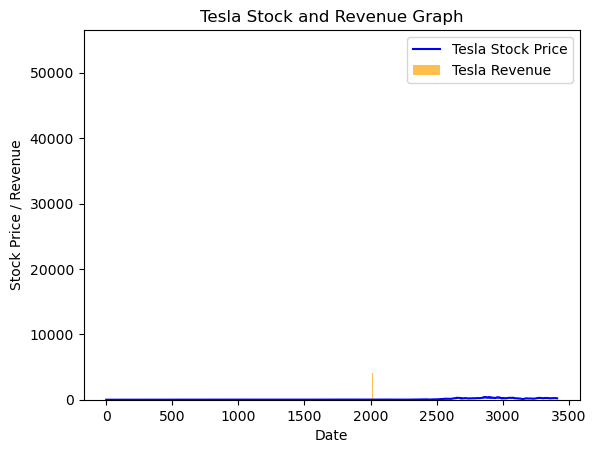

In [97]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    plt.plot(stock_data['Close'], label=f'{stock_name} Stock Price', color='blue')
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label=f'{stock_name} Revenue', color='orange', alpha=0.7)
    plt.title(f'{stock_name} Stock and Revenue Graph')
    plt.xlabel('Date')
    plt.ylabel('Stock Price / Revenue')
    plt.legend()
    plt.show()

# Example usage
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    # Assuming the stock_data and revenue_data have Date column
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock_name} Stock Price', color='red')
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label=f'{stock_name} Revenue', color='green', alpha=0.7)
    
    plt.title(f'{stock_name} Stock and Revenue Graph (Up to June 2021)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price / Revenue')
    plt.legend()
    plt.show()

# Example usage
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
